Creating articifial dataset from MTGSetB (Multi-Touch dataset B) for ER of Untrimmed gestures task.


In [1]:
import math
import os
import random
from typing import List, Tuple
import numpy as np
from skimage.draw import line_aa, line_nd
from utils.parsing import simple_structure_parsing
from matplotlib import pyplot as plt
import tensorflow as tf

# pathOutputDataset = "C:\\workspace2\\Datasets\\2D\\MTG\\MTGSetB\\UntrimmedBrutData\\"
pathInputData = "C:\\workspace2\\Datasets\\2D\\ILGDB\data\\"
pathOutputImage = "C:\\workspace2\\Datasets\\2D\\ILGDB\SeqImagesX5_withValid\\"
pathOutputPreprocess= "C:\\workspace2\\Datasets\\2D\\ILGDB\PreprocessedUntrimmedX5_withValid\\"
pathOutputPreprocessTest= pathOutputPreprocess+"Test"
pathOutputPreprocessValid= pathOutputPreprocess+"Valid"
pathOutputPreprocessTrain= pathOutputPreprocess+"Train"
separator = "\\"
pathAction = "C:\\workspace2\\Datasets\\2D\\ILGDB\\"
actionFileName = "Actions.csv"
if not os.path.exists(pathOutputPreprocess):
    os.mkdir(pathOutputPreprocess)
    os.mkdir(pathOutputPreprocessTest)
    os.mkdir(pathOutputPreprocessValid)
    os.mkdir(pathOutputPreprocessTrain)

In [2]:
f = open(pathAction+actionFileName)
actions  =  f.readlines()
f.close()
actions = list(map(lambda s: s.split(";")[1].strip(),actions))

In [3]:
f = open("config.txt")
configParams = f.readlines()
f.close()
configParams = eval("\n".join(configParams))

In [4]:
multiplierCoord = configParams["multiplierCoord"]

def readFileAndAddData(file:str, gestures: List[Tuple[List[Tuple[float,float,float]],str]],multiplierCoord):
    """
    add the gestures of the 'file' in the 'gestures' list
    :param file: the file (.pts) which contains gestures
    :param gestures: the list to fill with gestures
    :return: void
    """
    f = open(file)
    lines = f.readlines()
    f.close()
    currentList: List[Tuple[float,float,float]] = [] #x,y,pression, pression is not used here
    currentClasse = ""
    previousCount = 0
    for id,line in enumerate(lines):
        if line[0] == "#" or line.strip() == "":
            if id==len(lines)-1:
                gestures.append((currentList, currentClasse))
                continue

            if (line.strip()==""):#ignore blank line
                continue
            if (currentClasse != ""):# not for the first
                assert len(currentList)==previousCount
                gestures.append((currentList, currentClasse))

            currentClasse, previousCount = line[1:].split()
            previousCount = (int) (previousCount)
            currentList = []
        else:
            splitted: List[str] = line.split()
            assert len(splitted)==3
            currentList.append((float(splitted[0])*multiplierCoord,
                                float(splitted[1])*multiplierCoord,
                                float(splitted[2])))
            if id==len(lines)-1:
                gestures.append((currentList, currentClasse))

gesturesTrain : List[Tuple[List[Tuple[float,float,float]],str]] = []
gesturesValid : List[Tuple[List[Tuple[float,float,float]],str]] = []
gesturesTest : List[Tuple[List[Tuple[float,float,float]],str]] = []

listFilesTest = os.listdir(pathInputData+"Test")
listFilesTrain = os.listdir(pathInputData+"Train")

print("Testing set")
for fileSample in listFilesTest:
    print(fileSample)
    readFileAndAddData(pathInputData+"Test"+separator+fileSample,gesturesTest,multiplierCoord)
print("Training set")


random.seed(10)
random.shuffle(listFilesTrain)
validPart = 0.15 # = 1 file
nbForValid = int(validPart*len(listFilesTrain))

listFilesValid = listFilesTrain[:nbForValid]
listFilesTrain = listFilesTrain[nbForValid:]


for fileSample in listFilesTrain:
    readFileAndAddData(pathInputData+"Train"+separator+fileSample,gesturesTrain,multiplierCoord)
    readFileAndAddData(pathInputData+"Train"+separator+fileSample,gesturesTrain,multiplierCoord+0.1) # data augmentation
    readFileAndAddData(pathInputData+"Train"+separator+fileSample,gesturesTrain,multiplierCoord+0.2) # data augmentation
    readFileAndAddData(pathInputData+"Train"+separator+fileSample,gesturesTrain,multiplierCoord+0.3) # data augmentation
    readFileAndAddData(pathInputData+"Train"+separator+fileSample,gesturesTrain,multiplierCoord+0.4) # data augmentation

for fileSample in listFilesValid:
    readFileAndAddData(pathInputData+"Train"+separator+fileSample,gesturesValid,multiplierCoord)

print(len(gesturesTest))
print(len(gesturesTrain))
print(len(gesturesValid))

Testing set
1329154370_phase1.pts
1329154370_phase2.pts
1329154370_phase3.pts
1329154370_phase4.pts
1329310005_phase1.pts
1329310005_phase2.pts
1329310005_phase3.pts
1329310005_phase4.pts
1329320072_phase1.pts
1329320072_phase2.pts
1329320072_phase3.pts
1329320072_phase4.pts
1329390476_phase1.pts
1329390476_phase2.pts
1329390476_phase3.pts
1329390476_phase4.pts
1329403414_phase1.pts
1329403414_phase2.pts
1329403414_phase3.pts
1329403414_phase4.pts
1330109689_phase1.pts
1330109689_phase2.pts
1330109689_phase3.pts
1330109689_phase4.pts
1331545731_phase1.pts
1331545731_phase2.pts
1331545731_phase3.pts
1331545731_phase4.pts
1331548565_phase1.pts
1331548565_phase2.pts
1331548565_phase3.pts
1331548565_phase4.pts
1331572506_phase1.pts
1331572506_phase2.pts
1331572506_phase3.pts
1331572506_phase4.pts
1331737247_phase1.pts
1331737247_phase2.pts
1331737247_phase3.pts
1331737247_phase4.pts
1331741674_phase1.pts
1331741674_phase2.pts
1331741674_phase3.pts
1331741674_phase4.pts
Training set
1230
31

In [5]:
labelsTrain = [cl for _,cl in gesturesTrain]
labelsTest = [cl for _,cl in gesturesTest]
labelsValid = [cl for _,cl in gesturesValid]

Text(0.5, 1.0, 'Histogram of the number of elems by class (train set)')

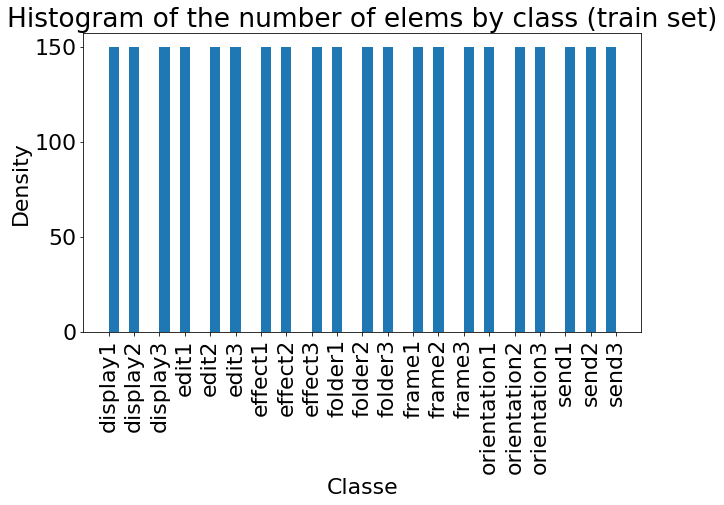

In [6]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,5.5))
plt.xticks(rotation=90)

density, bin, _ = plt.hist(labelsTrain,50)

plt.xlabel('Classe')
plt.ylabel('Density')
plt.title('Histogram of the number of elems by class (train set)')
# count = [len(gesture[0]) for gesture in gesturesSegmentsTest]

Text(0.5, 1.0, 'Histogram of the number of elems by class (train set)')

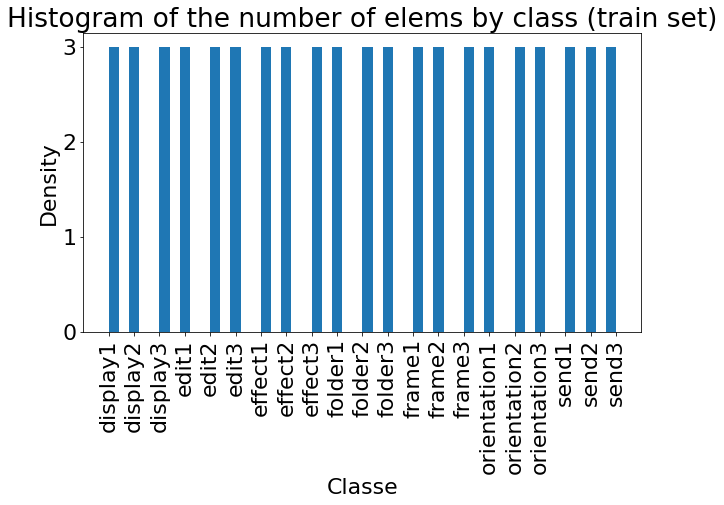

In [7]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,5.5))
plt.xticks(rotation=90)

density, bin, _ = plt.hist(labelsValid,50)

plt.xlabel('Classe')
plt.ylabel('Density')
plt.title('Histogram of the number of elems by class (train set)')

Text(0.5, 1.0, 'Histogram of the number of elems by class (test set)')

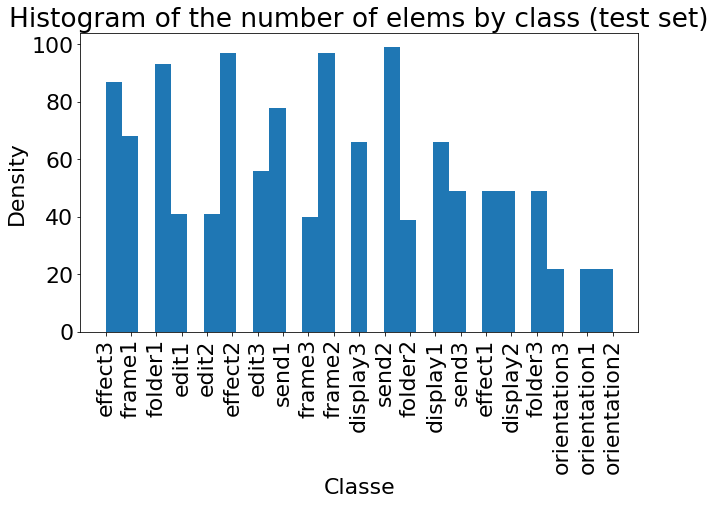

In [8]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,5.5))
plt.xticks(rotation=90)
_, _, _ = plt.hist(labelsTest,31)

plt.xlabel('Classe')
plt.ylabel('Density')
plt.title('Histogram of the number of elems by class (test set)')

In [9]:
def cumulateGesturesRandomly(gestures: List[Tuple[List[Tuple[float,float,float]],str]],
                             nbGesturePerSequence)->List[Tuple[List[Tuple[float,float,float]],List[Tuple[str,int,int]]]]:
    """

    :param gestures: List[Tuple[List[List[Tuple[float,float,float,float]]],str]]
    """
    listeOfRemainingIndexes = list(range(0,len(gestures)))
    SequencesOfGestures : List[Tuple[List[Tuple[float,float,float]],List[Tuple[str,int,int]]]] = []
    while len(listeOfRemainingIndexes)>0:
        lastPointCoord = (0,0)
        nbGesturePerSequenceToUse = random.randint(nbGesturePerSequence-2,nbGesturePerSequence+2)
        points : List[Tuple[float,float,float]] = []
        classNameStartEndStrokes:List[Tuple[str,int,int]] = []

        i=0
        while i<nbGesturePerSequenceToUse and len(listeOfRemainingIndexes)>0:
            indexChosen =  random.randint(0,len(listeOfRemainingIndexes)-1)
            gestureIndex = listeOfRemainingIndexes[indexChosen]
            offset = gestures[gestureIndex][0][0][0]-lastPointCoord[0],\
                     gestures[gestureIndex][0][0][1]-lastPointCoord[1] #compute the offset to link two gestures
            listeOfRemainingIndexes.remove(gestureIndex)
            classNameStartEndStrokes += [(gestures[gestureIndex][1],len(points),len(points)+len(gestures[gestureIndex][0])-1)]
            points += [ (p[0]-offset[0],p[1]-offset[1],p[2]) for p in gestures[gestureIndex][0]]
            lastPointCoord = points[-1][0],points[-1][1]
            i+=1
        SequencesOfGestures.append((points, classNameStartEndStrokes))
    return SequencesOfGestures

In [10]:
random.seed(5)
gesturesTest:List[Tuple[List[Tuple[float,float,float]],List[Tuple[str,int,int]]]] = cumulateGesturesRandomly(gesturesTest,6)
gesturesValid:List[Tuple[List[Tuple[float,float,float]],List[Tuple[str,int,int]]]] = cumulateGesturesRandomly(gesturesValid,6)

FullTrainSet:List[Tuple[List[Tuple[float,float,float]],List[Tuple[str,int,int]]]] = []
FullTrainSet += cumulateGesturesRandomly(gesturesTrain,6)
FullTrainSet += cumulateGesturesRandomly(gesturesTrain,6)
FullTrainSet += cumulateGesturesRandomly(gesturesTrain,6)
FullTrainSet += cumulateGesturesRandomly(gesturesTrain,6)
FullTrainSet += cumulateGesturesRandomly(gesturesTrain,6)
gesturesTrain = FullTrainSet
print(len(gesturesTest))

210


In [11]:
print(len(gesturesTrain))

2621


## Put each gesture in little pieces of fixed length

In [12]:
thresholdCuDi = configParams["thresholdCuDi"]*multiplierCoord
def segmentGestureInPiecesOfMovement(gesture:List[Tuple[float,float,float]],labelsForPoint:List[Tuple[str,int,int]],
                                     thresholdCuDi) \
        ->Tuple[List[List[Tuple[float, float, float]]], List[List[int]], List[Tuple[str, int, int]]]:
    currentCuDi = 0
    currentIndexPoint = 0

    previousPoint = np.array(gesture[0][0:2])
    pieces : List[List[Tuple[float,float,float]]] = []
    piecesLabels : List[List[int]] = []
    class_start_end_pieces : List[Tuple[str,int,int]] = []
    lastStartEnd = (labelsForPoint[0][1],labelsForPoint[0][2])
    cptStrokeBeginClass = 0
    cptStrokeCurrent = 0
    lastLab = labelsForPoint[0][0]
    currentListOfPoint:List[np.ndarray] = [previousPoint]
    while currentIndexPoint<len(gesture)-1:
        currentIndexPoint+=1
        coord = np.array(gesture[currentIndexPoint])[0:2]
        normDiff = np.linalg.norm(coord-previousPoint)
        if abs(currentCuDi+normDiff-thresholdCuDi)<0.00001: # threshold reached almost perfectly
            currentListOfPoint.append(coord)
            currentCuDi = 0
            pieces.append(currentListOfPoint)
            lab = [cl for i,(cl,start,end) in enumerate(labelsForPoint) if start<=currentIndexPoint-1<=end]
            labStartEnd = [(start,end) for i,(cl,start,end) in enumerate(labelsForPoint) if start<=currentIndexPoint-1<=end]
            assert len(lab)==1
            lab = lab[0]
            labStartEnd = labStartEnd[0]
            piecesLabels.append(actions.index(lastLab))

            if lastStartEnd[0]!=labStartEnd[0] or lastStartEnd[1]!=labStartEnd[1]:#we just change the cl   asse
                class_start_end_pieces.append((lastLab,cptStrokeBeginClass, cptStrokeCurrent))
                cptStrokeBeginClass = cptStrokeCurrent+1
            lastStartEnd = labStartEnd

            currentListOfPoint = [coord]
            previousPoint = coord
            cptStrokeCurrent += 1
            lastLab = lab
        elif currentCuDi+normDiff<thresholdCuDi: # threshold not reached yet
            currentListOfPoint.append(coord)
            currentCuDi += normDiff
            previousPoint = coord
        else: # over the threshold, in this case we interpolate linearly the 'perfect' point to reach the threshold
            missValue = thresholdCuDi-currentCuDi
            vectorPerfectLength = (coord-previousPoint)/normDiff*missValue
            intermediatePoint = previousPoint+vectorPerfectLength

            lab = [labelsForPoint[i][0] for i,(cl,start,end) in enumerate(labelsForPoint) if start<=currentIndexPoint-1<=end]
            labStartEnd = [(start,end) for i,(cl,start,end) in enumerate(labelsForPoint) if start<=currentIndexPoint-1<=end]
            assert len(lab)==1
            lab = lab[0]
            labStartEnd = labStartEnd[0]
            piecesLabels.append(actions.index(lastLab))

            if lastStartEnd[0]!=labStartEnd[0] or lastStartEnd[1]!=labStartEnd[1]:#we just change the cl   asse
                class_start_end_pieces.append((lastLab,cptStrokeBeginClass, cptStrokeCurrent))
                cptStrokeBeginClass = cptStrokeCurrent+1
            lastStartEnd = labStartEnd

            lastLab = lab
            currentListOfPoint.append(intermediatePoint)
            currentCuDi = 0
            pieces.append(currentListOfPoint)
            currentListOfPoint = [intermediatePoint]
            previousPoint = intermediatePoint
            currentIndexPoint -= 1 # to do the loop on the same 'coord' point which is not yet reached
            cptStrokeCurrent+=1

    # if there is some point at the end where the segments sum doesn't reach the threshold
    # we add them as another piece
    if len(currentListOfPoint) > 1:
        pieces.append(currentListOfPoint)
        # notEmptyId = [i for i in range(len(currentListOfPoint)) if len(currentListOfPoint[i])>0]
        # assert len(notEmptyId)>0
        # indexStrokeN = notEmptyId[0]
        lab = [cl for i,(cl,start,end) in enumerate(labelsForPoint) if start<=currentIndexPoint-1<=end]
        assert len(lab)==1
        lab = lab[0]
        piecesLabels.append(actions.index(lab))
        class_start_end_pieces.append((lab,cptStrokeBeginClass, cptStrokeCurrent))
        # print("passed here ")
    # pieces.append(None)
    # piecesLabels.append(actions.index(lastLab))
    lastClassStartEnd = class_start_end_pieces[-1]
    # class_start_end_pieces[-1] = (lastClassStartEnd[0], lastClassStartEnd[1],lastClassStartEnd[2]+1)
    assert len(pieces) == len(piecesLabels)
    # print(lastClassStartEnd[2], len(piecesLabels)-1)
    assert lastClassStartEnd[2] == len(piecesLabels)-1 #cpt is an index
    return pieces,piecesLabels,class_start_end_pieces

In [13]:
gesturesSegmentsTest: List[Tuple[List[List[Tuple[float, float, float]]], List[List[int]], List[Tuple[str, int, int]]]] = []
gesturesSegmentsTrain: List[Tuple[List[List[Tuple[float, float, float]]], List[List[int]], List[Tuple[str, int, int]]]] = []
gesturesSegmentsValid: List[Tuple[List[List[Tuple[float, float, float]]], List[List[int]], List[Tuple[str, int, int]]]] = []
print("Testing set...",)
for i,gesture in enumerate(gesturesTest):
    if (i%500==0):
        print(i,"/",len(gesturesTest))
    gestureSegments: List[List[Tuple[float, float, float]]]
    gestureClassPerSegment : List[List[int]]
    gestureSegments,gestureClassPerSegment,class_start_end_pieces = segmentGestureInPiecesOfMovement(gesture[0],gesture[1],thresholdCuDi)
    gesturesSegmentsTest.append((gestureSegments,gestureClassPerSegment,class_start_end_pieces))
print("Done,",len(gesturesTest),"elements")
print("Training set...")
for i,gesture in enumerate(gesturesTrain):
    if (i%500==0):
        print(i,"/",len(gesturesTrain))
    gestureSegments: List[List[Tuple[float, float, float]]]
    gestureClassPerSegment : List[List[int]]
    class_start_end_pieces : List[Tuple[str,int,int]]
    gestureSegments,gestureClassPerSegment,class_start_end_pieces = segmentGestureInPiecesOfMovement(gesture[0],gesture[1],thresholdCuDi)
    gesturesSegmentsTrain.append((gestureSegments,gestureClassPerSegment,class_start_end_pieces))
print("Done",len(gesturesTrain),"elements")

for i,gesture in enumerate(gesturesValid):
    if (i%500==0):
        print(i,"/",len(gesturesValid))
    gestureSegments: List[List[Tuple[float, float, float]]]
    gestureClassPerSegment : List[List[int]]
    class_start_end_pieces : List[Tuple[str,int,int]]
    gestureSegments,gestureClassPerSegment,class_start_end_pieces = segmentGestureInPiecesOfMovement(gesture[0],gesture[1],thresholdCuDi)
    gesturesSegmentsValid.append((gestureSegments,gestureClassPerSegment,class_start_end_pieces))
print("Done",len(gesturesValid),"elements")

Testing set...
0 / 210
Done, 210 elements
Training set...
0 / 2621
500 / 2621
1000 / 2621
1500 / 2621
2000 / 2621
2500 / 2621
Done 2621 elements
0 / 9
Done 9 elements


In [14]:
a = gesturesSegmentsTest[3][0]
print(len(a))
print(a[-1])
print(len(a[-2][0]))

149
[array([165.8       , 128.17656934]), array([165.8, 128. ]), array([165.8, 127.8]), array([165.8, 127.4])]
2


In [15]:
a = gesturesSegmentsTest[3][2]
print(len(a))
print(a)
print(len(a[-2]))

7
[('effect1', 0, 28), ('folder1', 29, 47), ('send1', 48, 70), ('frame1', 71, 86), ('send2', 87, 113), ('frame2', 114, 136), ('edit1', 137, 148)]
3


In [16]:
a = gesturesSegmentsTest[3][1]
print(len(a))
print(a)

149
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


### Exploration of the number of segments

(array([  1,  77, 440, 687, 670, 456, 229,  51,   6,   4], dtype=int64), array([  4. ,  24.3,  44.6,  64.9,  85.2, 105.5, 125.8, 146.1, 166.4,
       186.7, 207. ]))


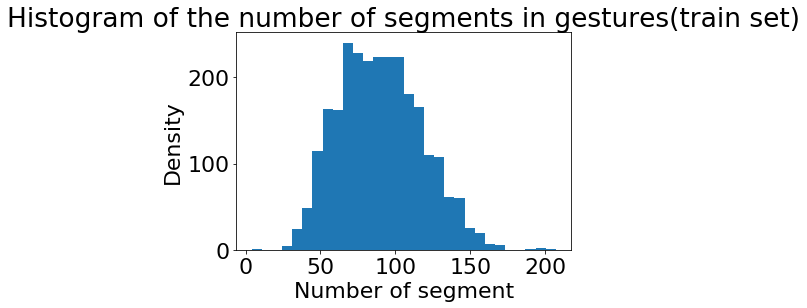

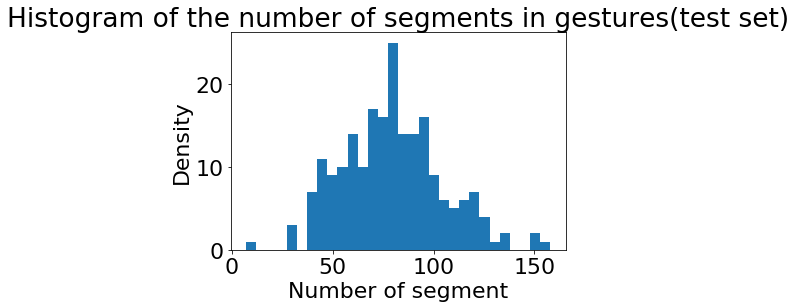

In [17]:
count = [len(gesture[0]) for gesture in gesturesSegmentsTrain]
print(np.histogram(count))
fig, ax = plt.subplots()

_, _, _ = ax.hist(count, 30,)

ax.set_xlabel('Number of segment')
ax.set_ylabel('Density')
ax.set_title('Histogram of the number of segments in gestures(train set)')
count = [len(gesture[0]) for gesture in gesturesSegmentsTest]
plt.savefig("AfterDataAugmentationTrain.png")
fig, ax = plt.subplots()

_, _, _ = ax.hist(count, 30)

ax.set_xlabel('Number of segment')
ax.set_ylabel('Density')
ax.set_title('Histogram of the number of segments in gestures(test set)')
plt.savefig("AfterDataAugmentationTest.png")

## Pixelisation of the gestures along the time

In [18]:
dimensionsOutputImage = np.array(configParams["dimensionsOutputImage"]) # x and y dimension of output
slidingWindowSize = int(configParams["slidingWindowSize"]) # x and y dimension of output
def pixelisationOfThePiecesOfGestures(gestureSegments: List[List[np.ndarray]]):
    center = dimensionsOutputImage/2.
    gest1 = gestureSegments[0][0][0],gestureSegments[0][0][1]
    offSet = center-gest1
    gest1 = gest1+offSet
    minX = gest1[0]
    minY = gest1[1]
    maxX = gest1[0]
    maxY = gest1[1]
    imagesAlongTime:List[np.ndarray[dimensionsOutputImage]] = [] # len(imagesAlongTime)==len(gestureSegments)
    imagesFingerPosAlongTime:List[np.ndarray[dimensionsOutputImage]] = [] # len(imagesAlongTime)==len(gestureSegments)
    image = np.zeros(shape=dimensionsOutputImage,dtype="bool")
    cpt = 0
    idSeg = 0
    neverBeenBack = True
    while idSeg < len(gestureSegments):
        segment = gestureSegments[idSeg]
        imageLastPoint = np.zeros(shape=dimensionsOutputImage,dtype="bool")
        for idPoint1 in range(0,len(segment)-1):
            shifted=False
            idPoint2 = idPoint1+1
            coordP1 = segment[idPoint1][0:2]+offSet
            coordP2 = segment[idPoint2][0:2]+offSet
            if coordP2[0]>dimensionsOutputImage[0]-2: # if X > border
                #shift all the image to left
                toShift = math.ceil(coordP2[0]-(dimensionsOutputImage[0]-2))
                offSet = offSet-[toShift,0]
                minX-=toShift
                shifted = True
                toShift,axis = -toShift,0
            if coordP2[1]>dimensionsOutputImage[1]-2:# if Y is < 1
                toShift = (math.ceil(coordP2[1])-(dimensionsOutputImage[1]-2))
                minY-=toShift
                offSet = offSet-[0,toShift]
                shifted = True
                toShift,axis = -toShift,1
            # if <0
            if coordP2[0]<0+2:
                toShift = -math.floor(coordP2[0])+2
                # if maxX+toShift>dimensionsOutputImage[0]: #overflow case
                #     print( Exception("Overlflow on right"))
                maxX+=toShift
                offSet = offSet+[toShift,0]
                shifted,axis = True,0
            if coordP2[1]<0+2:
                toShift = -math.floor(coordP1[1])+2
                maxY+=toShift
                offSet = offSet+[0,toShift]
                shifted,axis = True,1
            minX = min(coordP2[0],minX)
            maxX = max(coordP2[0],maxX)
            minY = min(coordP2[1],minY)
            maxY = min(coordP2[1],maxY)
            rr,cc,_ = line_aa(int(round(coordP1[0])),int(round(coordP1[1])),int(round(coordP2[0])),int(round(coordP2[1])))
            if shifted:
                #we put black at the opposite of the image in order to do the roll correctly
                if axis==0:
                    if toShift > 0:
                        image[-toShift:]= np.zeros([toShift,dimensionsOutputImage[1]])
                    else:
                        image[:-toShift]= np.zeros([-toShift,dimensionsOutputImage[1]])
                else:
                    if toShift > 0:
                        image[:,-toShift:]= np.zeros([dimensionsOutputImage[1],toShift])
                    else:
                        image[:,:-toShift]= np.zeros([dimensionsOutputImage[1],-toShift])
                #draw segments
                image[[r%(dimensionsOutputImage[0]) for r in rr],[c%(dimensionsOutputImage[1]) for c in cc]] = 1 # draw the line in the image
                if idPoint2 == len(segment)-1:
                    imageLastPoint[rr[-1]%(dimensionsOutputImage[0]),cc[-1]%(dimensionsOutputImage[1])] = 1 # draw the line in the image
                    imageLastPoint = np.roll(imageLastPoint,toShift,axis=axis)
                #roll image (shift)
                image = np.roll(image,toShift,axis=axis)
            else:
                image[[max(min(r,dimensionsOutputImage[0]-1),0) for r in rr],[max(min(c,dimensionsOutputImage[1]-1),0) for c in cc]] = 1
                if (idPoint2==len(segment)-1):
                    imageLastPoint[max(min(rr[-1],dimensionsOutputImage[0]-1),0),max(min(cc[-1],dimensionsOutputImage[1]-1),0)] = 1

        # imagesAlongTime.append(np.copy(np.transpose(image)))
        # imagesFingerPosAlongTime.append(np.copy(np.transpose(imageLastPoint)))
        if neverBeenBack and idSeg<slidingWindowSize-1:
            imagesAlongTime.append(np.copy(np.transpose(image)))
            imagesFingerPosAlongTime.append(np.copy(np.transpose(imageLastPoint)))
        elif cpt==slidingWindowSize:
            imagesAlongTime.append(np.copy(np.transpose(image)))
            imagesFingerPosAlongTime.append(np.copy(np.transpose(imageLastPoint)))
            image = np.zeros(shape=dimensionsOutputImage,dtype="bool")
            cpt=0
            if idSeg!=0:
                idSeg-= (slidingWindowSize-1)
                neverBeenBack = False
        cpt+=1
        idSeg+=1

    if cpt-1!=0: # if we didnt finished the sliding window
        imagesAlongTime.append(np.copy(np.transpose(image)))
        imagesFingerPosAlongTime.append(np.copy(np.transpose(imageLastPoint)))
    # image = np.zeros(shape=dimensionsOutputImage,dtype="bool") #add a black image at end
    # imagesAlongTime.append(np.copy(np.transpose(image)))
    return imagesAlongTime,imagesFingerPosAlongTime

### One exemple

In [19]:
idToTest  = 0#3431#1607#1578 #1463 # 87 # 1600
segments = gesturesSegmentsTest[idToTest][0]
segmentsClasses = gesturesSegmentsTest[idToTest][1]
firstGesture,firstPenPosGestureAlongTime = pixelisationOfThePiecesOfGestures(segments)

In [20]:
print(len(segments))
print(len(segmentsClasses))

115
115


In [21]:
len(firstGesture) #+1 due to black final window

115

<Figure size 432x288 with 0 Axes>

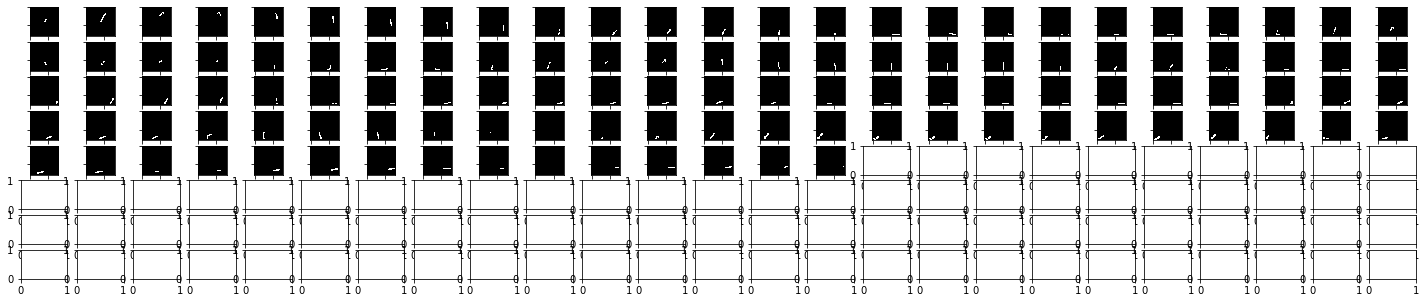

In [22]:
%matplotlib inline
plt.gray()
_, axs = plt.subplots(8, 25, figsize=(25, 5))
axs = axs.flatten()
for img, ax in zip(firstGesture[0:8*25], axs):
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(img)

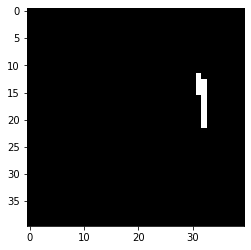

In [23]:
plt.imshow(firstGesture[5]*255, interpolation='nearest')

### Get actions.csv which contains associations between name of class id
format
0;act1
1;act2



### Explore frequency by class

## Store the images in the preprocessed folder

In [24]:
saveImage = True
print("Testing set")
if saveImage:
    try:
        os.mkdir(pathOutputImage)
        os.mkdir(pathOutputImage+"Test")
        os.mkdir(pathOutputImage+"Train")
    except:
        pass

count = 0
def generatorData(gestureSegmentsAndClasses,folder,isTest=False):
    """

    @param gestureSegments:
    @param folder:
    @return:
    """
    global count
    for i in range(len(gestureSegmentsAndClasses)):
        if(i%100==0 or i==1):
            print(i,"on",len(gestureSegmentsAndClasses))
        classesPerSeq: List[Tuple[str,int,int]]
        gestureSegments, classPerSegment,classesPerSeq = gestureSegmentsAndClasses[i]
        images,fingerPos = pixelisationOfThePiecesOfGestures(gestureSegments)
        img = np.expand_dims(images,axis=-1)
        imgFingerPos = np.expand_dims(fingerPos,axis=-1)
        finalImg2Chan = np.concatenate((img,imgFingerPos),axis=-1)

        classes_names = [gest[0] for gest in classesPerSeq]
        classes_indexes = [actions.index(cl) for cl in classes_names]
        classesPerSeq = [(actions.index(cl),s,e) for cl,s,e in classesPerSeq]
        classesPerFrame = np.array(classPerSegment)
        count +=1
        if not isTest:
            yield finalImg2Chan,classesPerFrame,classes_indexes
        else :
            yield finalImg2Chan,classesPerFrame,classes_indexes,classesPerSeq


        # np.save(pathOutputPreprocess+folder+separator+name+".npy",finalImg2Chan)

        if saveImage:
            pathFold = pathOutputImage+folder+separator+str(i)+"_"+"_".join(classes_names)
            os.mkdir(pathFold)
            for id,im in enumerate(img) :
                fing = imgFingerPos[id].astype("uint8")*255
                imCast = im.astype("uint8")*255
                imcolorR = ((imCast+fing)%256).astype("uint8")
                imcolorGB = (imCast-fing).astype("uint8")
                finalImg = np.concatenate((imcolorR,imcolorGB,imcolorGB),axis=-1)
                plt.imsave(pathFold+separator+str(id)+"_"+actions[int(classesPerFrame[id])]+".png",finalImg)

Testing set


In [25]:
genTest = lambda : generatorData(gesturesSegmentsTest,"Test",True)
genTrain = lambda : generatorData(gesturesSegmentsTrain,"Train")
genValid = lambda : generatorData(gesturesSegmentsValid,"Valid")
print("Generators Ready")

Generators Ready


In [28]:
nbClass= len(actions)

In [32]:
def repeatGT(input1, input2, input3):
    #input 2 : [batch seq 1]
    # input2 = tf.reshape(input2,[tf.shape(input2)[0],tf.shape(input2)[1]])
    # input2 = tf.one_hot(input2,nbClass) #[batch,segments,nbClass]
    return input1,(input2[:,tf.newaxis],input2[:,tf.newaxis],input3[:,tf.newaxis])

def getDataset(generator,isTest):
    if not isTest:
        output_shapes = (tf.TensorShape([None, dimensionsOutputImage[0], dimensionsOutputImage[1], 2]),
                                       tf.TensorShape([None]), tf.TensorShape([None]))
        output_types = (tf.float32, tf.int32, tf.int32)
    else :
        output_shapes = (tf.TensorShape([None, dimensionsOutputImage[0], dimensionsOutputImage[1], 2]),
                                       tf.TensorShape([None]), tf.TensorShape([None]),tf.TensorShape([None,3]))
        output_types = (tf.float32, tf.int32, tf.int32,tf.int32)

    dataset = tf.data.Dataset.from_generator(
                        generator,
                        output_types = output_types,
                        output_shapes = output_shapes
                    )
    if not isTest:
        dataset = dataset.map(repeatGT) # repeat the GT + one hot encoding
    # dataset = dataset.shuffle(buffer_size=size, reshuffle_each_iteration=True)

    # dataset = dataset.map(maskingGT) # masking
    # dataset = dataset.repeat()
    return dataset

In [33]:
count = 0
tf.data.experimental.save(getDataset(genTest,True),pathOutputPreprocessTest)
countTest = count
print("COUNT TEST",countTest)

0 on 210
1 on 210
100 on 210
200 on 210
COUNT TEST 210


In [34]:
count = 0
tf.data.experimental.save(getDataset(genTrain,False),pathOutputPreprocessTrain)
countTrain = count
print("COUNT Train",countTrain)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
0 on 2621
1 on 2621
100 on 2621
200 on 2621
300 on 2621
400 on 2621
500 on 2621
600 on 2621
700 on 2621
800 on 2621
900 on 2621
1000 on 2621
1100 on 2621
1200 on 2621
1300 on 2621
1400 on 2621
1500 on 2621
1600 on 2621
1700 on 2621
1800 on 2621
1900 on 2621
2000 on 2621
2100 on 2621
2200 on 2621
2300 on 2621
2400 on 2621
2500 on 2621
2600 on 2621
COUNT Train 2621


In [35]:
count = 0
tf.data.experimental.save(getDataset(genValid,False),pathOutputPreprocessValid)
countValid = count
print("COUNT Valid",countValid)

0 on 9
1 on 9
COUNT Valid 9


In [36]:
f = open(pathOutputPreprocessTrain+"count","w+")
f.write(str(countTrain))
f.close()


f = open(pathOutputPreprocessTest+"count","w+")
f.write(str(countTest))
f.close()

f = open(pathOutputPreprocessValid+"count","w+")
f.write(str(countValid))
f.close()